# Read Park-and-Visit Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from visualizationHelpers import *

C:\Users\Saki\anaconda3\envs\geoEnv\lib\site-packages\pyproj\__init__.py:91: UserWarning: Valid PROJ data directory not found. Either set the path using the environmental variable PROJ_LIB or with `pyproj.datadir.set_data_dir`.
  warnings.warn(str(err))


In [2]:
metadata = pd.read_csv('Dynamic_Park-and-visit_metadata.csv')
waypoints = pd.read_csv('Dynamic_Park-and-visit_waypoints.csv', parse_dates=['time'])

In [3]:
metadata.head()

,TripID,ParkingSearch_StartingTime,ParkingSearch_EndingTime,Familiar_With_Destination,Parking_Location_Type,Parking_Cost_Status,Parking_Search_Duration_min,Parking_Search_Duration_min_Predicted,PSD_MAE
0,05202011261947,2020-11-26 20:20:18,2020-11-26 20:22:01,1,on-street,Free,1.716667,1.150000,0.566667
1,01202011050748,2020-11-05 07:57:10,2020-11-05 08:00:00,1,on-street,Paid,2.833333,2.933333,0.100000
2,01202011081503,2020-11-08 15:23:45,2020-11-08 15:24:30,1,on-street,Free,0.750000,0.316667,0.433333
3,01202011081454,2020-11-08 15:02:20,2020-11-08 15:02:20,1,off-street,Free,0.000000,1.250000,1.250000
4,01202011141400,2020-11-14 14:08:50,2020-11-14 14:09:12,0,off-street,Free,0.366667,0.216667,0.150000


In [4]:
waypoints.head()

,TripID,lon,lat,time,speed_kmh,label
0,01202102222011,8.677233,50.130181,2021-02-22 20:11:11,0.000000,driving
1,01202102222011,8.677274,50.130207,2021-02-22 20:11:39,4.195406,driving
2,01202102222011,8.677753,50.130292,2021-02-22 20:11:45,20.599526,driving
3,01202102222011,8.678072,50.130509,2021-02-22 20:11:51,19.489262,driving
4,01202102222011,8.678317,50.130747,2021-02-22 20:11:57,16.513604,driving


# Example Journey

In [5]:
waypoints['remainingTime'] = waypoints.groupby('TripID')['time'].transform(lambda x: (x.max() - x).dt.total_seconds())

C:\Users\Saki\anaconda3\envs\geoEnv\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


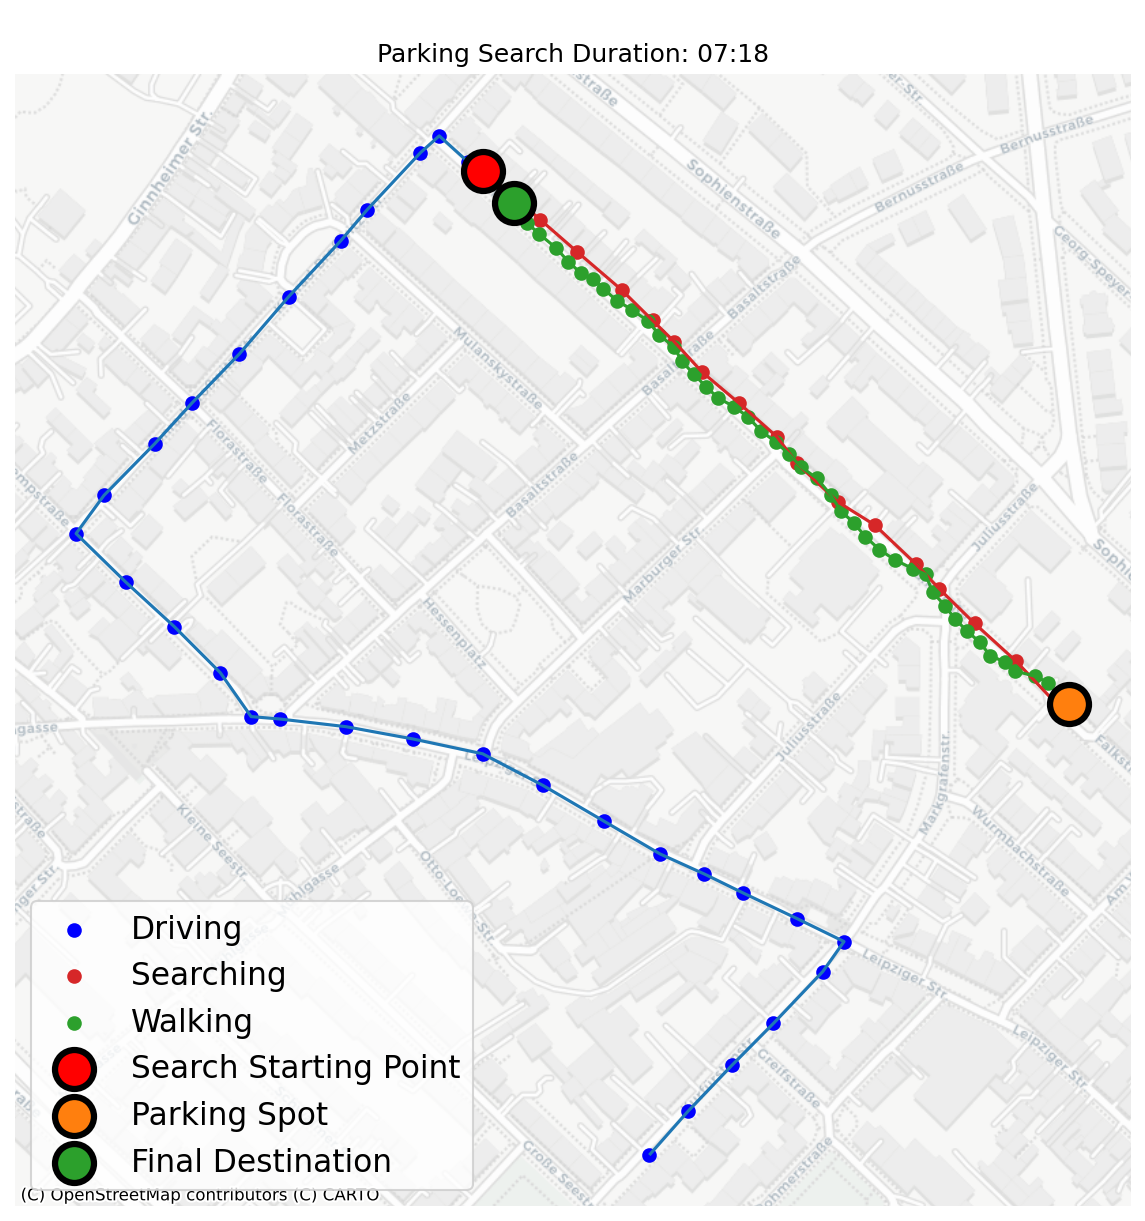

In [6]:
fig,ax = plt.subplots(dpi=150, figsize=(10,10))
plot_gps_route(ax, waypoints, trip_ID="01202102221857", label='label', n_driving_points=30, basemap=True)
plt.legend(fontsize=15);

# Discriptive Analysis

In [7]:
print("Number of trips:   ", len(metadata))
print("Parking Search Duration Statistics (MM:SS format):")
print(metadata['Parking_Search_Duration_min'].describe()[1:].apply(format_duration, unit='min'))

Number of trips:    161
Parking Search Duration Statistics (MM:SS format):
mean    01:20
std     02:30
min     00:00
25%     00:00
50%     00:30
75%     01:40
max     22:00
Name: Parking_Search_Duration_min, dtype: object


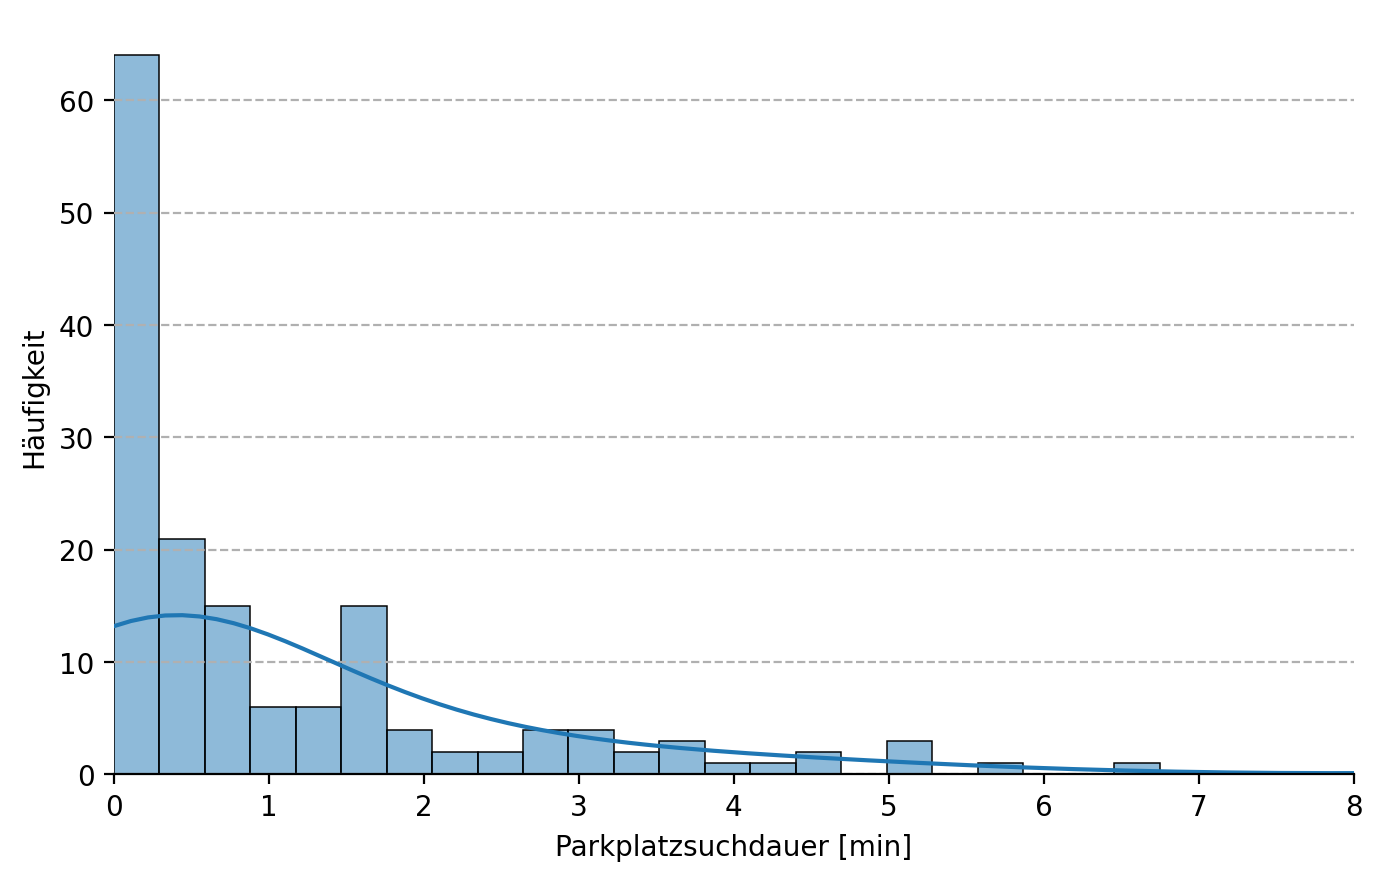

In [8]:
plt.figure(figsize=(8,5), dpi=200)
sns.histplot(metadata['Parking_Search_Duration_min'], bins=75, kde=True)
sns.despine(left=True)

# plt.suptitle('\nAverage Parking Search Speed',y=1,fontsize=13)
plt.grid(axis='y', ls='--')
plt.xlim([0,8])
plt.xlabel('Parkplatzsuchdauer [min]')
plt.ylabel('Häufigkeit')

plt.show()

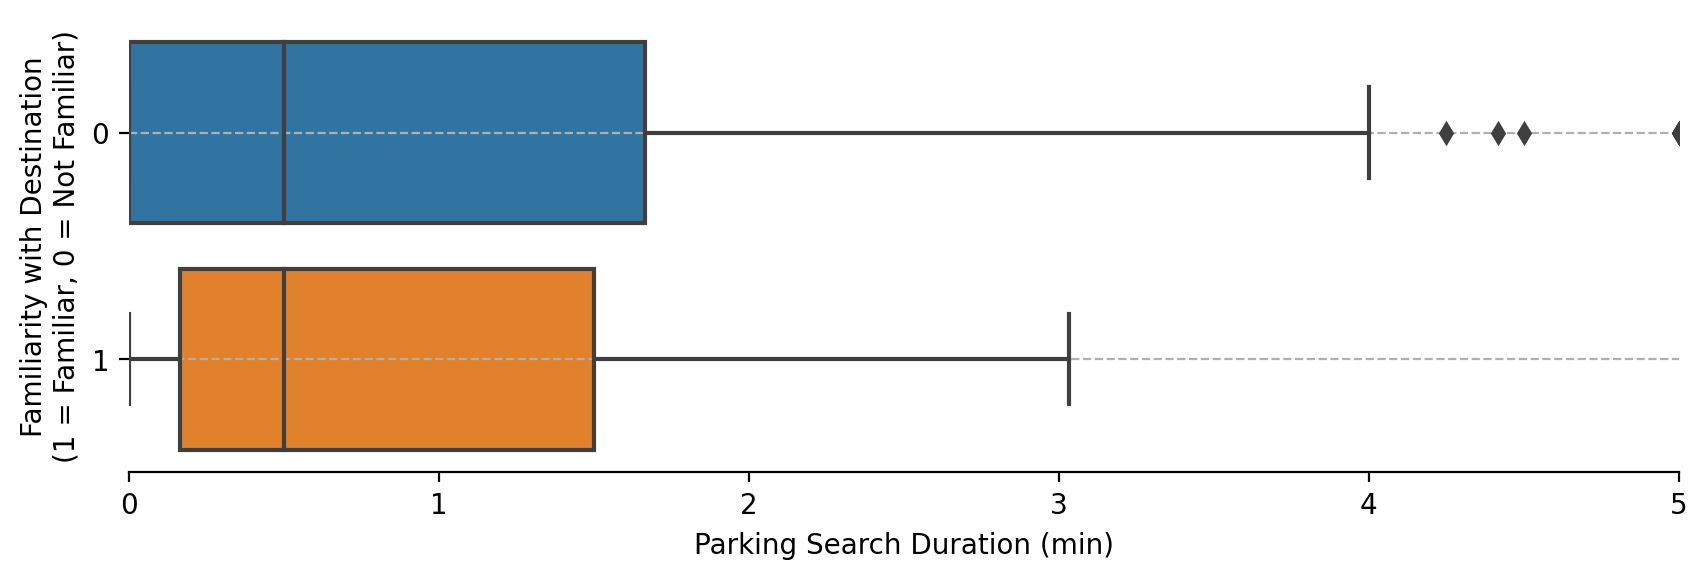

In [12]:
plt.figure(figsize=(10, 3), dpi=200)
sns.boxplot(x='Parking_Search_Duration_min', y='Familiar_With_Destination', data=metadata, orient='h')
plt.ylabel('Familiarity with Destination\n(1 = Familiar, 0 = Not Familiar)')
plt.xlabel('Parking Search Duration (min)')
sns.despine(left=True)
plt.grid(axis='y', ls='--')
plt.xlim([0,5])
plt.show()

# Predictions

In [ ]:
import sys
sys.path.append('../src/neural_network')
from predict import *